In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group0 = [14,16,18,13]

bookings = pd.read_json("../../chatbot_data/bookings/bookings14-9-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,8,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

pilotBookings = validBookings.loc[validBookings['user'].isin(group0)].copy() 
pilotBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
2,2023-08-24 19:00:00+00:00,5400,washing_and_drying,None,yes,0.539100,13,electricity_consumption,14,2023-08-22 20:50:20+00:00,2023-08-22 20:50:20+00:00
3,2023-08-23 18:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-23 16:33:59+00:00,2023-08-23 08:32:34+00:00
4,2023-08-25 09:00:00+00:00,3600,washing_and_drying,None,yes,0.730841,15,electricity_consumption,16,2023-08-24 16:32:35+00:00,2023-08-24 16:32:35+00:00
5,2023-08-27 17:00:00+00:00,3600,dishwasher,None,yes,1.229527,15,electricity_consumption,16,2023-08-24 16:38:47+00:00,2023-08-24 16:38:47+00:00
7,2023-08-26 09:00:00+00:00,1800,washing_and_drying,None,yes,0.235443,17,electricity_consumption,18,2023-08-25 19:03:58+00:00,2023-08-25 19:03:58+00:00
11,2023-08-26 12:00:00+00:00,7200,dishwasher,None,yes,2.459053,15,electricity_consumption,16,2023-08-26 11:44:59+00:00,2023-08-26 11:44:59+00:00
20,2023-08-30 12:00:00+00:00,1800,dishwasher,None,yes,0.614763,15,electricity_consumption,16,2023-08-29 15:24:55+00:00,2023-08-29 15:24:55+00:00
21,2023-08-29 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-29 15:45:42+00:00,2023-08-29 15:45:42+00:00
22,2023-08-29 16:00:00+00:00,1800,hob,None,yes,0.197686,12,electricity_consumption,13,2023-08-29 15:48:23+00:00,2023-08-29 15:48:23+00:00
24,2023-08-30 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-30 09:29:35+00:00,2023-08-30 09:23:30+00:00


32 bookings were made by the pilot group.
3 of those bookings were modified.


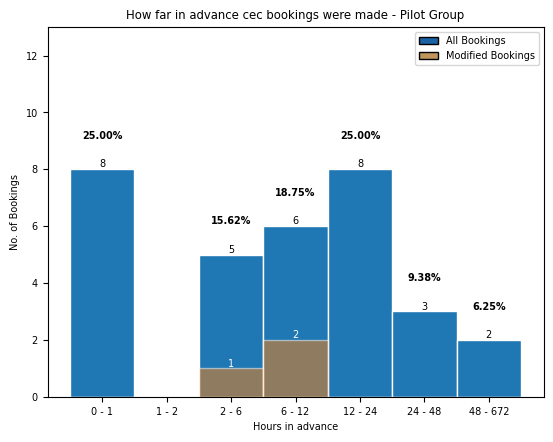

In [3]:
# Pilot Group Analysis

# How far in advance was a booking made in hours?
pilotBookings['diff'] = (pilotBookings['start'] - pilotBookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(pilotBookings['diff'],bins)

# make modified bookings histogram
modified_bookings = pilotBookings['diff'].where(pilotBookings['modified_at'] > pilotBookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance cec bookings were made - Pilot Group")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(pilotBookings)
print(total_bookings, 'bookings were made by the pilot group.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all pilot group bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
    
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in pilot group
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 5  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('pilot_cec_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# User 14 - Barbara

bookingsUser14 = pilotBookings.loc[pilotBookings['user'] == 14].copy()

bookingsUser14

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
2,2023-08-24 19:00:00+00:00,5400,washing_and_drying,None,yes,0.5391,13,electricity_consumption,14,2023-08-22 20:50:20+00:00,2023-08-22 20:50:20+00:00,46.161111
87,2023-09-14 19:00:00+00:00,5400,washing_and_drying,None,yes,0.5391,13,electricity_consumption,14,2023-09-13 19:40:47+00:00,2023-09-13 19:40:47+00:00,23.320278


2 bookings were made by User 14 - Barbara.
0 of those bookings were modified.


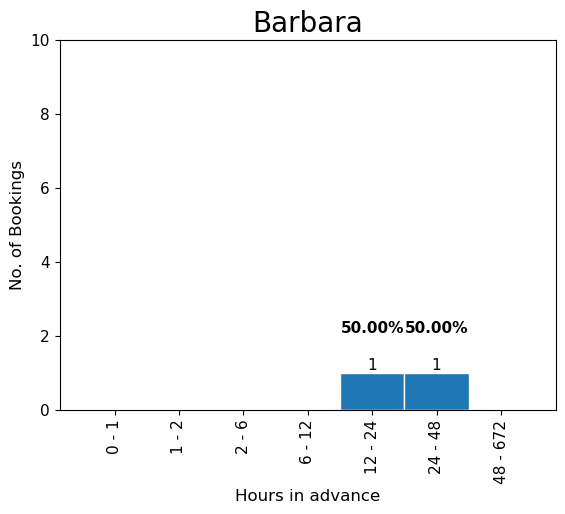

In [5]:
# Booking pattern for User 14

# How far in advance was a booking made in hours?
bookingsUser14['diff'] = (bookingsUser14['start'] - bookingsUser14['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser14['diff'],bins)

# make modified bookings histogram
modified_bookings_user_14 = bookingsUser14['diff'].where(bookingsUser14['modified_at'] > bookingsUser14['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_14, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Barbara", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser14)
print(total_bookings, 'bookings were made by User 14 - Barbara.')
print(modified_bookings_user_14.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 14 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 14
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('barbara_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# User 16 - Alla

bookingsUser16 = pilotBookings.loc[pilotBookings['user'] == 16].copy()

bookingsUser16

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
4,2023-08-25 09:00:00+00:00,3600,washing_and_drying,None,yes,0.730841,15,electricity_consumption,16,2023-08-24 16:32:35+00:00,2023-08-24 16:32:35+00:00,16.456944
5,2023-08-27 17:00:00+00:00,3600,dishwasher,None,yes,1.229527,15,electricity_consumption,16,2023-08-24 16:38:47+00:00,2023-08-24 16:38:47+00:00,72.353611
11,2023-08-26 12:00:00+00:00,7200,dishwasher,None,yes,2.459053,15,electricity_consumption,16,2023-08-26 11:44:59+00:00,2023-08-26 11:44:59+00:00,0.250278
20,2023-08-30 12:00:00+00:00,1800,dishwasher,None,yes,0.614763,15,electricity_consumption,16,2023-08-29 15:24:55+00:00,2023-08-29 15:24:55+00:00,20.584722
34,2023-09-03 13:00:00+00:00,1800,washing_and_drying,None,yes,0.365421,15,electricity_consumption,16,2023-09-03 12:26:28+00:00,2023-09-03 12:26:28+00:00,0.558889
39,2023-09-10 11:00:00+00:00,10800,dishwasher,,somewhat,1.250000,15,electricity_consumption,16,2023-09-07 17:30:35+00:00,2023-09-07 17:30:35+00:00,65.490278
40,2023-09-07 18:00:00+00:00,10800,dishwasher,,yes,1.250000,15,electricity_consumption,16,2023-09-07 17:30:54+00:00,2023-09-07 17:30:54+00:00,0.485000
41,2023-09-08 11:38:00+00:00,10800,dishwasher,,no,1.250000,15,electricity_consumption,16,2023-09-07 17:32:41+00:00,2023-09-07 17:32:41+00:00,18.088611
46,2023-09-08 11:00:00+00:00,3600,washing_and_drying,,yes,0.370000,15,electricity_consumption,16,2023-09-08 10:56:56+00:00,2023-09-08 10:56:56+00:00,0.051111
47,2023-09-08 11:00:00+00:00,3600,washing_and_drying,,no,0.370000,15,electricity_consumption,16,2023-09-08 10:57:47+00:00,2023-09-08 10:57:47+00:00,0.036944


18 bookings were made by User 16 - Alla.
0 of those bookings were modified.


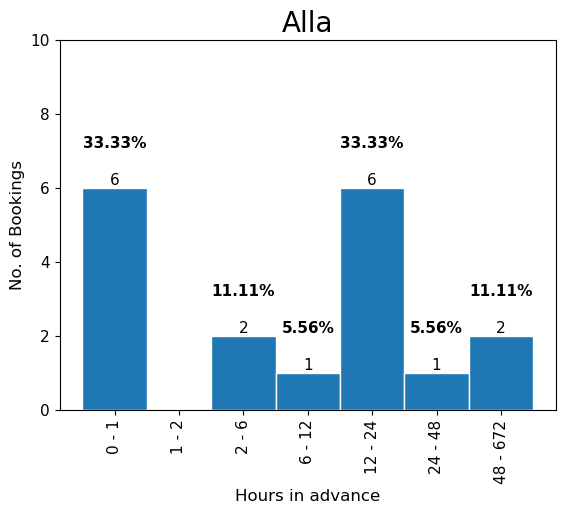

In [7]:
# Booking pattern for User 16

# How far in advance was a booking made in hours?
bookingsUser16['diff'] = (bookingsUser16['start'] - bookingsUser16['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser16['diff'],bins)

# make modified bookings histogram
modified_bookings_user_16 = bookingsUser16['diff'].where(bookingsUser16['modified_at'] > bookingsUser16['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_16, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Alla", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser16)
print(total_bookings, 'bookings were made by User 16 - Alla.')
print(modified_bookings_user_16.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 16 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 16
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('alla_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# User 18 - Chris

bookingsUser18 = pilotBookings.loc[pilotBookings['user'] == 18].copy()

bookingsUser18

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
7,2023-08-26 09:00:00+00:00,1800,washing_and_drying,None,yes,0.235443,17,electricity_consumption,18,2023-08-25 19:03:58+00:00,2023-08-25 19:03:58+00:00,13.933889
73,2023-09-13 11:00:00+00:00,3600,other,,yes,1.000000,17,electricity_consumption,18,2023-09-11 22:37:12+00:00,2023-09-11 22:37:12+00:00,36.380000


2 bookings were made by User 18 - Chris.
0 of those bookings were modified.


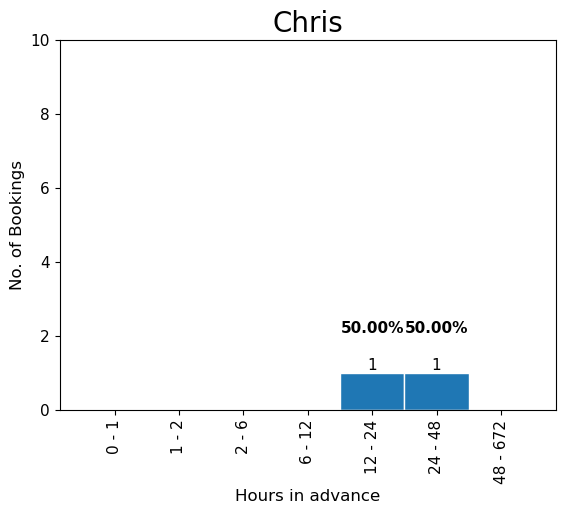

In [58]:
# Booking pattern for User 18 - Chris

# How far in advance was a booking made in hours?
bookingsUser18['diff'] = (bookingsUser18['start'] - bookingsUser18['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser18['diff'],bins)

# make modified bookings histogram
modified_bookings_user_18 = bookingsUser18['diff'].where(bookingsUser18['modified_at'] > bookingsUser18['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_18, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Chris", fontsize = 20)

# # Create legend with hex colors
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser18)
print(total_bookings, 'bookings were made by User 18 - Chris.')
print(modified_bookings_user_18.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 18 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 18
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('chris_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# User 13 - Sonia

bookingsUser13 = pilotBookings.loc[pilotBookings['user'] == 13].copy()

bookingsUser13

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff
3,2023-08-23 18:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-23 16:33:59+00:00,2023-08-23 08:32:34+00:00,9.457222
21,2023-08-29 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-29 15:45:42+00:00,2023-08-29 15:45:42+00:00,0.238333
22,2023-08-29 16:00:00+00:00,1800,hob,None,yes,0.197686,12,electricity_consumption,13,2023-08-29 15:48:23+00:00,2023-08-29 15:48:23+00:00,0.193611
24,2023-08-30 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-30 09:29:35+00:00,2023-08-30 09:23:30+00:00,6.608333
25,2023-08-30 16:00:00+00:00,1800,hob,None,yes,0.197686,12,electricity_consumption,13,2023-08-30 09:26:17+00:00,2023-08-30 09:26:17+00:00,6.561944
28,2023-08-31 16:00:00+00:00,10800,washing_and_drying,None,yes,1.324720,12,electricity_consumption,13,2023-08-31 08:59:23+00:00,2023-08-31 08:59:23+00:00,7.010278
38,2023-09-06 17:00:00+00:00,10800,washing_and_drying,,yes,1.324720,12,electricity_consumption,13,2023-09-06 12:03:28+00:00,2023-09-06 12:01:57+00:00,4.967500
65,2023-09-11 17:00:00+00:00,1800,hob,,somewhat,0.200000,12,electricity_consumption,13,2023-09-11 08:56:04+00:00,2023-09-11 08:56:04+00:00,8.065556


8 bookings were made by User 13 - Sonia.
3 of those bookings were modified.


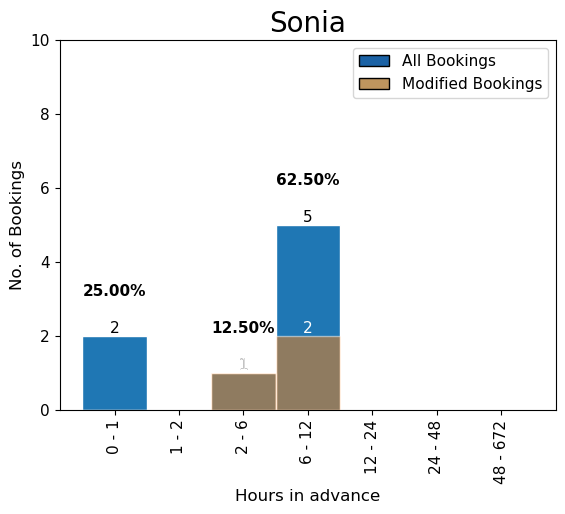

In [57]:
# Booking pattern for User 13 - Sonia

# How far in advance was a booking made in hours?
bookingsUser13['diff'] = (bookingsUser13['start'] - bookingsUser13['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 11})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(bookingsUser13['diff'],bins)

# make modified bookings histogram
modified_bookings_user_13 = bookingsUser13['diff'].where(bookingsUser13['modified_at'] > bookingsUser13['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings_user_13, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)], rotation = 90)

ax.set_xlabel("Hours in advance", fontsize = 12)
ax.set_ylabel("No. of Bookings", fontsize = 12)

# Add the title to the histogram
ax.set_title("Sonia", fontsize = 20)

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(bookingsUser13)
print(total_bookings, 'bookings were made by User 13 - Sonia.')
print(modified_bookings_user_13.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all user 13 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    
    if percentage != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in user 13
for i, bar in enumerate(nested_bars):
    height = bar.get_height() # this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = 10  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('sonia_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()